House prediction dataset:
`https://www.kaggle.com/datasets/harlfoxem/housesalesprediction`

The dataset contains house sale prices for King county, which includes Seattle.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('../data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Linear Regression
A method to help us understand the relationship between two variables:
- The predictor/independent variable (X)
- The response/dependent variable (Y)

The result of a linear regression is a function that predicts the response variable as a function of the predictor

$
\widehat{Y} = a + bX
$
- `a` refers to the `intercept` of the line
- `b` refers to the `slope`

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# Create a linear regression object
lm = LinearRegression()
lm

LinearRegression()

### How could the `sqft_living` help us predict the house price?

In [6]:
X = df[['sqft_living']] # This needs to be a 2D array
Y = df['price'] # This can be 1D

In [7]:
lm.fit(X, Y)

LinearRegression()

In [8]:
# Get the output prediction using X
Yhat = lm.predict(X)
# Print first 5 results
Yhat[:5]

array([287555.06702452, 677621.82640197, 172499.40418656, 506441.44998452,
       427866.85097324])

In [9]:
# Get the value of the intercept (a parameter)
lm.intercept_

-43580.74309447361

In [10]:
# Get the value of the slope (b)
lm.coef_

array([280.6235679])

Final estimated linear model

$
\widehat{Y} = a + bX
$

In our case:
$
\widehat{Y} = -43580.74 + 280.62356X
$

In [11]:
yhat = -43580.74 + 280.62356 * X
print(f'Using X price = {Yhat}')
# Or using price
price = -43580.74 + 280.62356 * df['sqft_living']
print(f'Using price = {price}')

Using X price = [287555.06702452 677621.82640197 172499.40418656 ... 242655.29616092
 405416.96554144 242655.29616092]
Using price = 0        287555.0608
1        677621.8092
2        172499.4012
3        506441.4376
4        427866.8408
            ...     
21608    385773.3068
21609    604659.6836
21610    242655.2912
21611    405416.9560
21612    242655.2912
Name: sqft_living, Length: 21613, dtype: float64


## Task 1
Repeat the process (Linear Model prediction) but using `bedrooms` as the independent variable and again `price` as your dependent variable.

In [12]:
X = df[['bedrooms']]
Y = df['price']

lm2 = LinearRegression()
lm2.fit(X, Y)

print(f'The model has a intercept a of {lm2.intercept_} and a slope b of {lm2.coef_}')

The model has a intercept a of 129802.35631825973 and a slope b of [121716.12651184]


In [13]:
# Equation
yhat =  129802.35631825973 + 121716.12651184 * X
print(f'Using X price = {Yhat}')

Using X price = [287555.06702452 677621.82640197 172499.40418656 ... 242655.29616092
 405416.96554144 242655.29616092]


## Multiple Linear Regression
If you want to use more variables in our model to predict the price, then use a `multiple linear regression`

$
\widehat{Y} = a + b_{1}X_{1} + b_{2}X_{2} + b_{3}X_{3}... + b_{n}X_{n}
$

In this case good features are:
- sqft_living
- bedrooms
- bathrooms
- sqft_lot

In [14]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../data/kc_house_data.csv')

In [15]:
# Get all the predictor variables
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']]
Y = df['price']

In [16]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [17]:
# Get the intercept (a)
a = lm.intercept_
a

79092.32040168752

In [18]:
# Get the slopes (b1, b2, b3, b4)
bs = list(lm.coef_)
bs

[314.29172074654906,
 -59406.812405435456,
 6268.660401823767,
 -0.37765257884149556]

In [19]:
Yhat = a + bs[0] * df['sqft_living'] + bs[1] * df['bedrooms'] + bs[2] * df['bathrooms'] + bs[3] * df['sqft_lot']
Yhat

0        275871.036998
1        719971.131432
2        204775.455179
3        474394.561754
4        438367.862006
             ...      
21608    396982.741865
21609    580955.302268
21610    285047.915072
21611    418508.453026
21612    285151.391879
Length: 21613, dtype: float64

### Model Evaluation Using Visualization
#### Regression Plot
Regression plots are a great tool to plot Linear Regression. This plot shows a combination for a scatter plot and a linear regression line

(0.0, 8084041.023887554)

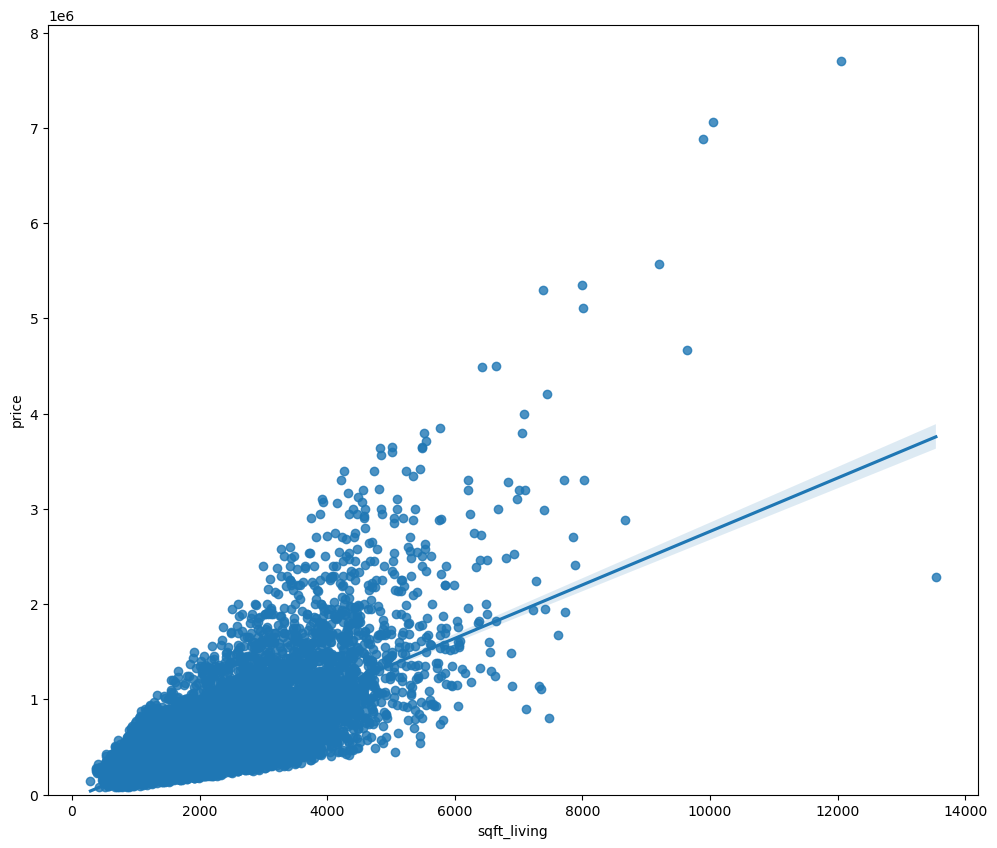

In [20]:
width = 12
height = 10
# Plot the figure
plt.figure(figsize=(width, height))
sns.regplot(x='sqft_living', y='price', data=df)
plt.ylim(0,) # ylim is used to set the limit of the y axis

(0.0, 8081250.0)

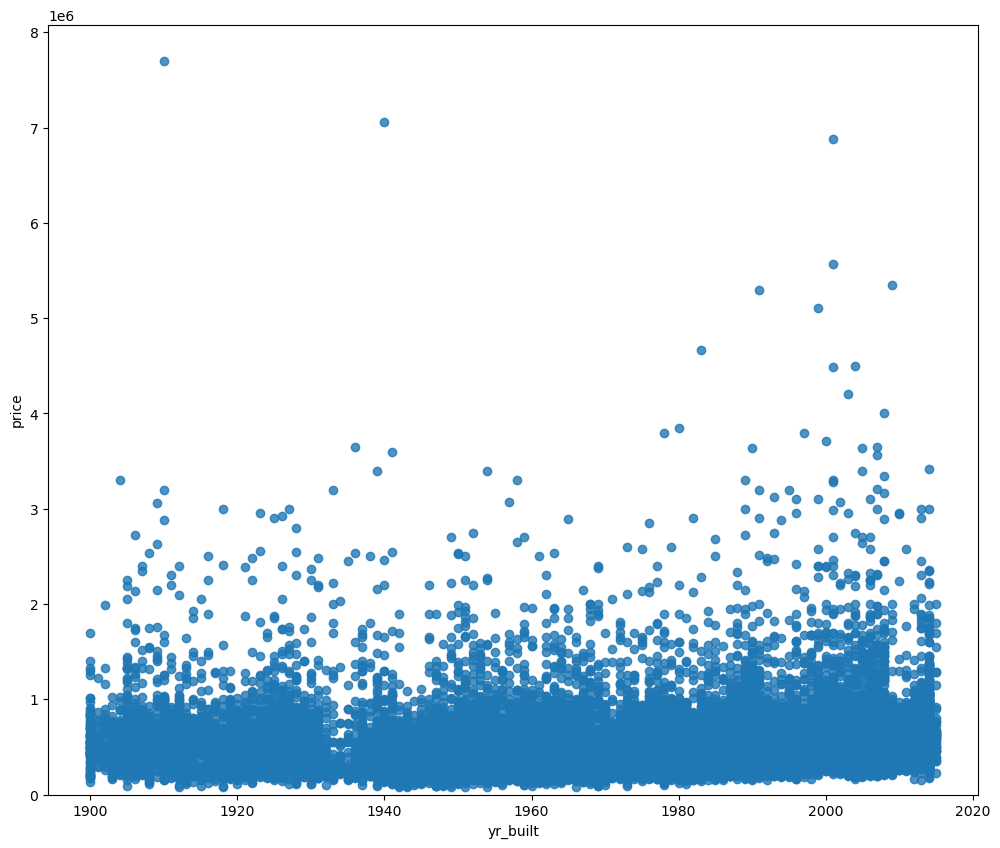

In [21]:
# Compare now year the house was build vs the price
plt.figure(figsize=(width, height))
sns.regplot(x='yr_built', y='price', data=df)
plt.ylim(0,) # ylim is used to set the limit of the y axis

### Residual Plot
This is a good way to visualize the `variance` of the data.
- `Residual` is the difference between the `observed value (Y)` and the predicted value `yhat`

<Axes: xlabel='sqft_living', ylabel='price'>

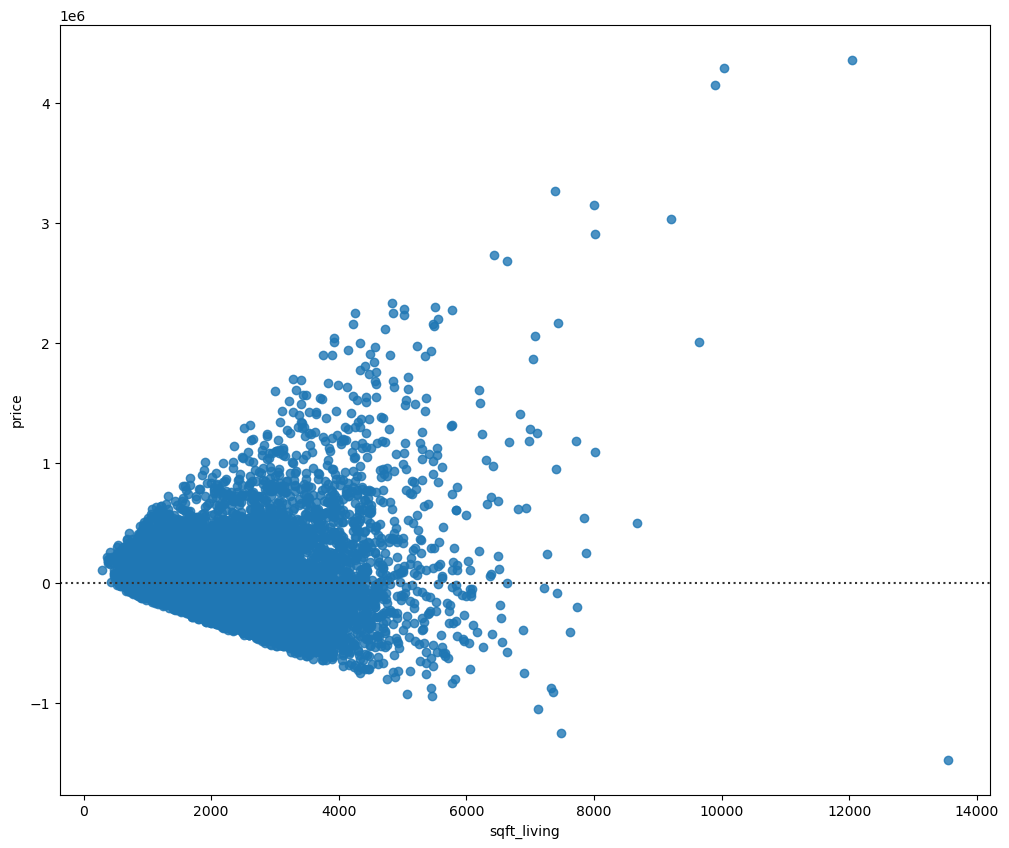

In [22]:
plt.figure(figsize=(12, 10))
sns.residplot(x = df['sqft_living'], y=df['price'])

### Multiple Linear Regression Model Visualization

In [23]:
# Make our prediction
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']]
Y = df['price'] # This can be 1D
lm = LinearRegression()
lm.fit(X, Y)
Yhat = lm.predict(X)

Text(0, 0.5, 'Proportion of homes')

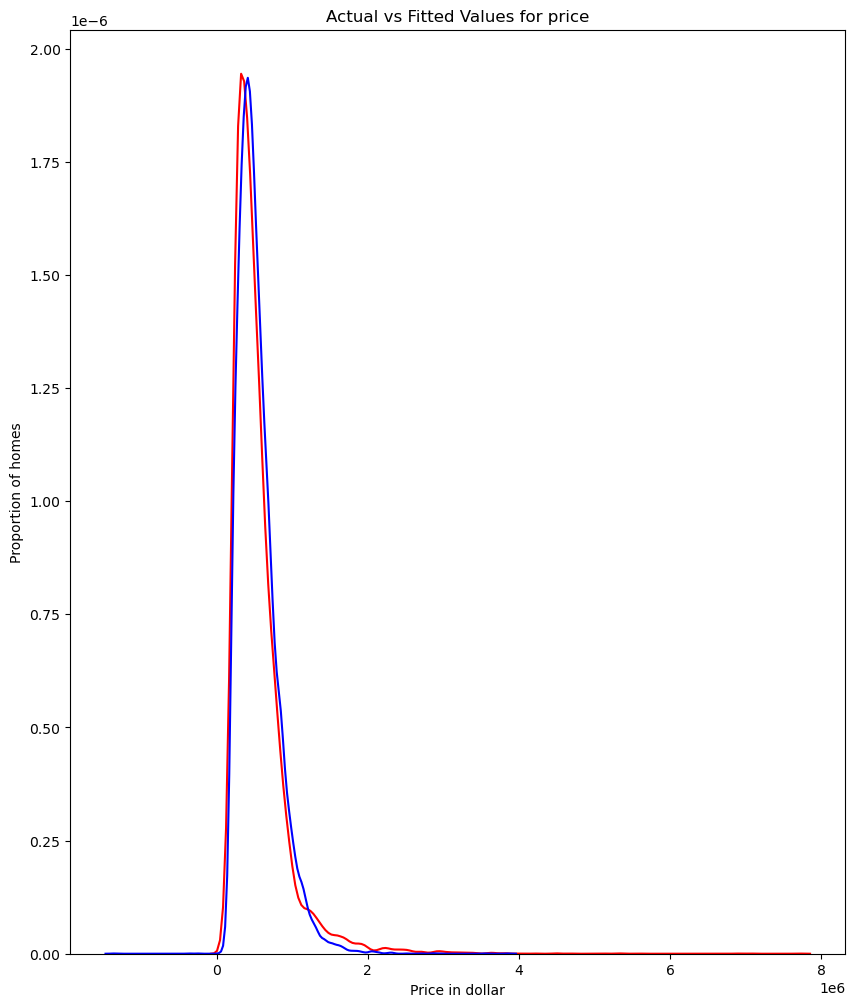

In [24]:
plt.figure(figsize=(10, 12))
ax1 = sns.kdeplot(df['price'], color='r', label='Actual Value')
sns.kdeplot(Yhat, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for price')
plt.xlabel('Price in dollar')
plt.ylabel('Proportion of homes')

In [25]:
def PlotPoly(model, independent_variable, dependent_variable, name):
    x_new = np.linspace(15, 55, 100) # Linspace for x axis
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for price vs length')
    ax = plt.gca() #gca returns the current axes
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf() #get the current figure
    plt.xlabel(name)
    plt.ylabel('Price of Homes')
    plt.show()
    plt.close()

Get the variables  

In [27]:
x = df['sqft_living']
y = df['price']

In [28]:
# Fit the polynomial (3rd order, cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

            3           2
-3.841e-06 x + 0.08705 x - 90.18 x + 3.368e+05


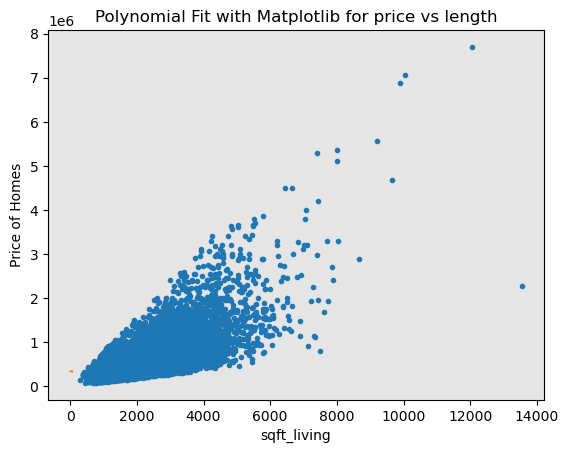

In [29]:
# Plot the function
PlotPoly(p, x, y, 'sqft_living')

### Measures for In-sample Evaluations

You need to do a quantitative measure to determine how accurate your model is. There are two measurements we do:
- $R^{2}$: Coefficient of determination (how close is to the fitted regression line)
- $MeanSquareError(MSE)$: Measures the average of the square errors

#### Model 1: Simple Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../data/kc_house_data.csv')

# Get all the predictor variables
X = df[['sqft_living']]
Y = df['price']
Z = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']]

In [47]:
lm = LinearRegression()
# Calculate our R^2
lm.fit(X, Y)
# find the R^2
print(f'The R^2 is: {lm.score(X, Y)}')

# Interpretation: 49% der Varianz in den Daten kann durch das Feature 'sqft_living' erklärt werden (Ziel ist natürlich nahezu die komplette Varianz erklären zu können)

The R^2 is: 0.4928532179037931


In [48]:
# Calculate the MSE
Yhat = lm.predict(X)
print(f'The output of the first four predicted value is {Yhat[0:4]}')

The output of the first four predicted value is [287555.06702452 677621.82640197 172499.40418656 506441.44998452]


In [49]:
from sklearn.metrics import mean_squared_error
# Compare it to the prediction
mse = mean_squared_error(df['price'], Yhat)
print(f'The MSE of prices is {mse}')

The MSE of prices is 68351286833.039825


#### Model 2: Multiple linear Regression

In [50]:
# Multiple linear regression
lm.fit(Z, df['price'])
print(f'R^2 is {lm.score(Z, df['price'])}')

R^2 is 0.5086633263098967


In [51]:
# Get prediction of multifit
Y_predict_multifit = lm.predict(Z)
# Compare the predicted result with the actual result
print(f'The MSE of price predicted value using multifilt is : {mean_squared_error(df['price'], Y_predict_multifit)}')

The MSE of price predicted value using multifilt is : 66220461413.89708


#### Model 3: Polynomial Fit

In [52]:
from sklearn.metrics import r2_score

X1 = df['sqft_living']
Y1 = df['price']

f = np.polyfit(X1, Y1, 3) # Get polyfit
p = np.poly1d(f)

r_square = r2_score(Y1, p(X1))
print(f'The R-square value is {r_square}')

The R-square value is 0.5390045510503199


## Prediction and Decision Making

In the previous example we trained the model using the method `fit`. Now we will use the method `predict` to get a prediction

In [57]:
# Create a new input
new_input = np.arange(500, 1000, 1).reshape(-1, 1)
# Fit the model
lm.fit(X, Y)
lm


LinearRegression()

In [58]:
yhat = lm.predict(new_input)
yhat[0:5]

c:\Users\carst\anaconda3\envs\CS4580_Module6\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([96731.04085425, 97011.66442215, 97292.28799005, 97572.91155794,
       97853.53512584])

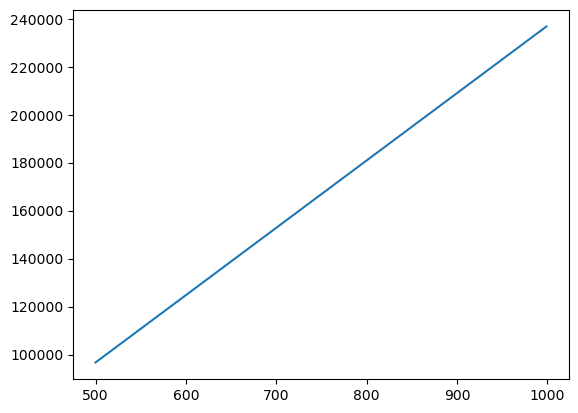

In [59]:
plt.plot(new_input, yhat)

### Decision Making: What is a Good Model Fit?

- What is a good $R^{2} value?$
    - The model with a `high` $R^{2}$ value is a better fit
- What is a good $MSE$ value?
    - The model with the `smallest` $MSE$ is a better fit